# Exercise 1

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df=pd.read_csv('./data/international-airline-passengers.csv')
df.head()

,Month,Thousand Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                  144 non-null object
Thousand Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [3]:
df['Month']=pd.to_datetime(df['Month'])
df=df.set_index('Month')
df.head()

,Thousand Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


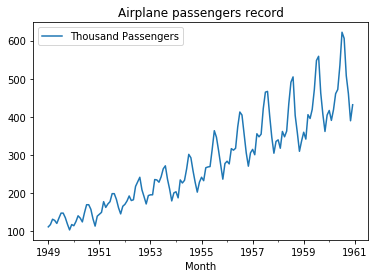

In [4]:
df.plot(title="Airplane passengers record")

# Exercise2

In [5]:
df=pd.read_csv('./data/weight-height.csv')

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [8]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


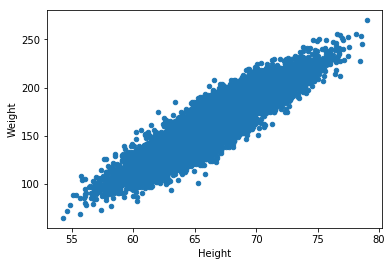

In [10]:
df.plot(kind='scatter', x='Height', y='Weight')

In [11]:
males=df[df['Gender']== 'Male']
females=df[df['Gender']== 'Female']

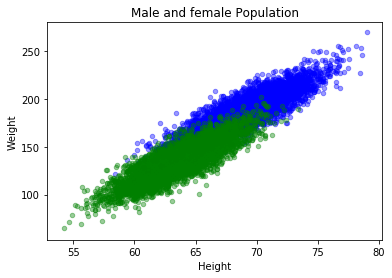

In [16]:
fig, ax = plt.subplots()

males.plot(kind='scatter', x='Height', y='Weight', 
            ax=ax, color='blue', alpha=0.4, 
            title="Male and female Population")

females.plot(kind='scatter', x='Height', y='Weight', 
            ax=ax, color='green', alpha=0.4)

In [19]:
df['gendercolor']=df['Gender'].map({'Male':'blue', 'Female':'green'})
df.head()

,Gender,Height,Weight,GenderColor,gendercolor
0,Male,73.847017,241.893563,blue,blue
1,Male,68.781904,162.310473,blue,blue
2,Male,74.110105,212.740856,blue,blue
3,Male,71.730978,220.042470,blue,blue
4,Male,69.881796,206.349801,blue,blue


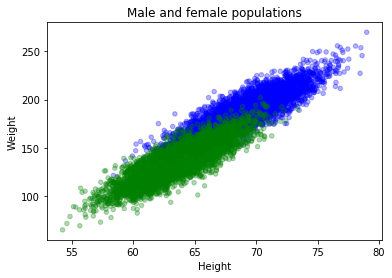

In [21]:
df.plot(kind='scatter', x='Height', y='Weight', 
        c=df['gendercolor'], alpha=0.3, 
        title='Male and female populations')

Text(0.5,0,'Height')

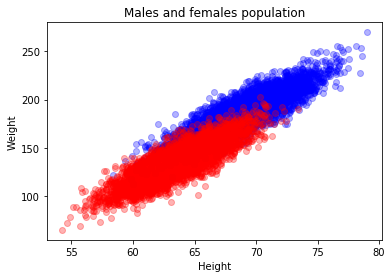

In [22]:
fig, ax = plt.subplots()

ax.plot(males['Height'], males['Weight'], 'ob',
        females['Height'], females['Weight'],'or', alpha=0.3)

plt.title('Males and females population')
plt.ylabel('Weight')
plt.xlabel('Height')

# Exercise 3

In [23]:
dfpvt=df.pivot(columns='Gender', values = 'Weight')
print(df.head())
print('___________')
dfpvt.head()

  Gender     Height      Weight GenderColor gendercolor
0   Male  73.847017  241.893563        blue        blue
1   Male  68.781904  162.310473        blue        blue
2   Male  74.110105  212.740856        blue        blue
3   Male  71.730978  220.042470        blue        blue
4   Male  69.881796  206.349801        blue        blue
___________


Gender,Female,Male
0,NaN,241.893563
1,NaN,162.310473
2,NaN,212.740856
3,NaN,220.042470
4,NaN,206.349801


Text(0,0.5,'Weights(lbs)')

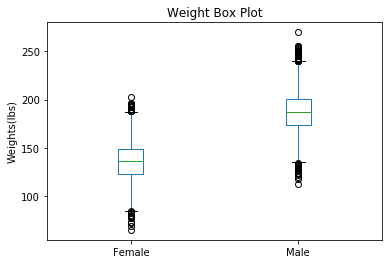

In [24]:
dfpvt.plot(kind='box')
plt.title("Weight Box Plot")
plt.ylabel('Weights(lbs)')

# Exercise 5

Matrix of corealtion among all the cloumns except passengerID

In [25]:
df=pd.read_csv('./data/titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000BC6133898>,
      dtype=object)

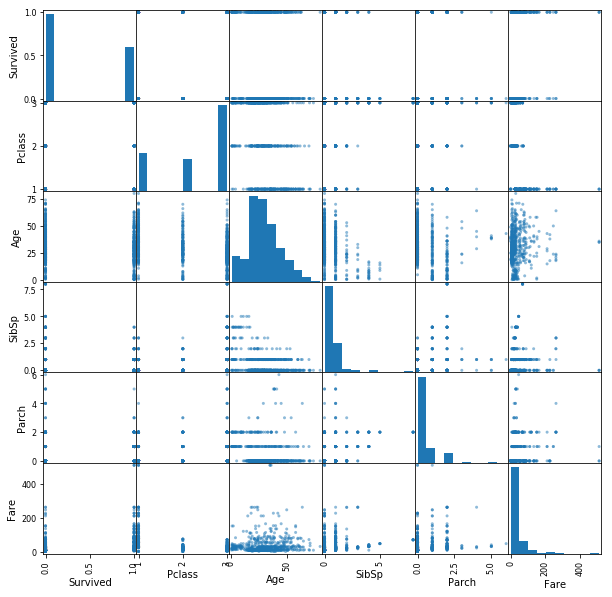

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.drop('PassengerId', axis=1), figsize=(10,10))